In [1]:
import pandas as pd # Data manipulation tool

## Loading the data

In [2]:
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/The Spark Foundation-GRIP/Iris.csv',index_col=0)
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the data

In [3]:
# Exploring the data info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [44]:
pd.options.display.float_format = '{:0.2f}'.format
raw_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


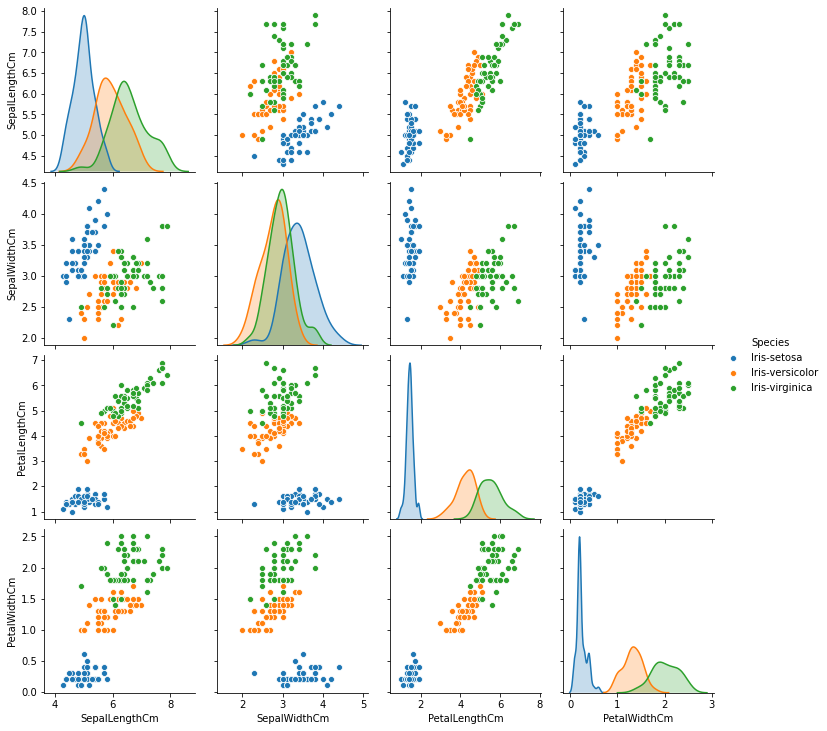

In [48]:
from seaborn import pairplot
pairplot(data=raw_data,hue='Species')

In [5]:
# Check point
df = raw_data.copy()
x_features = df.iloc[:,:-1]
target = df.iloc[:,-1]

## Creating the model

In [8]:
# Selecting the model and training the data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_features,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualization of Decision Tree

## First type

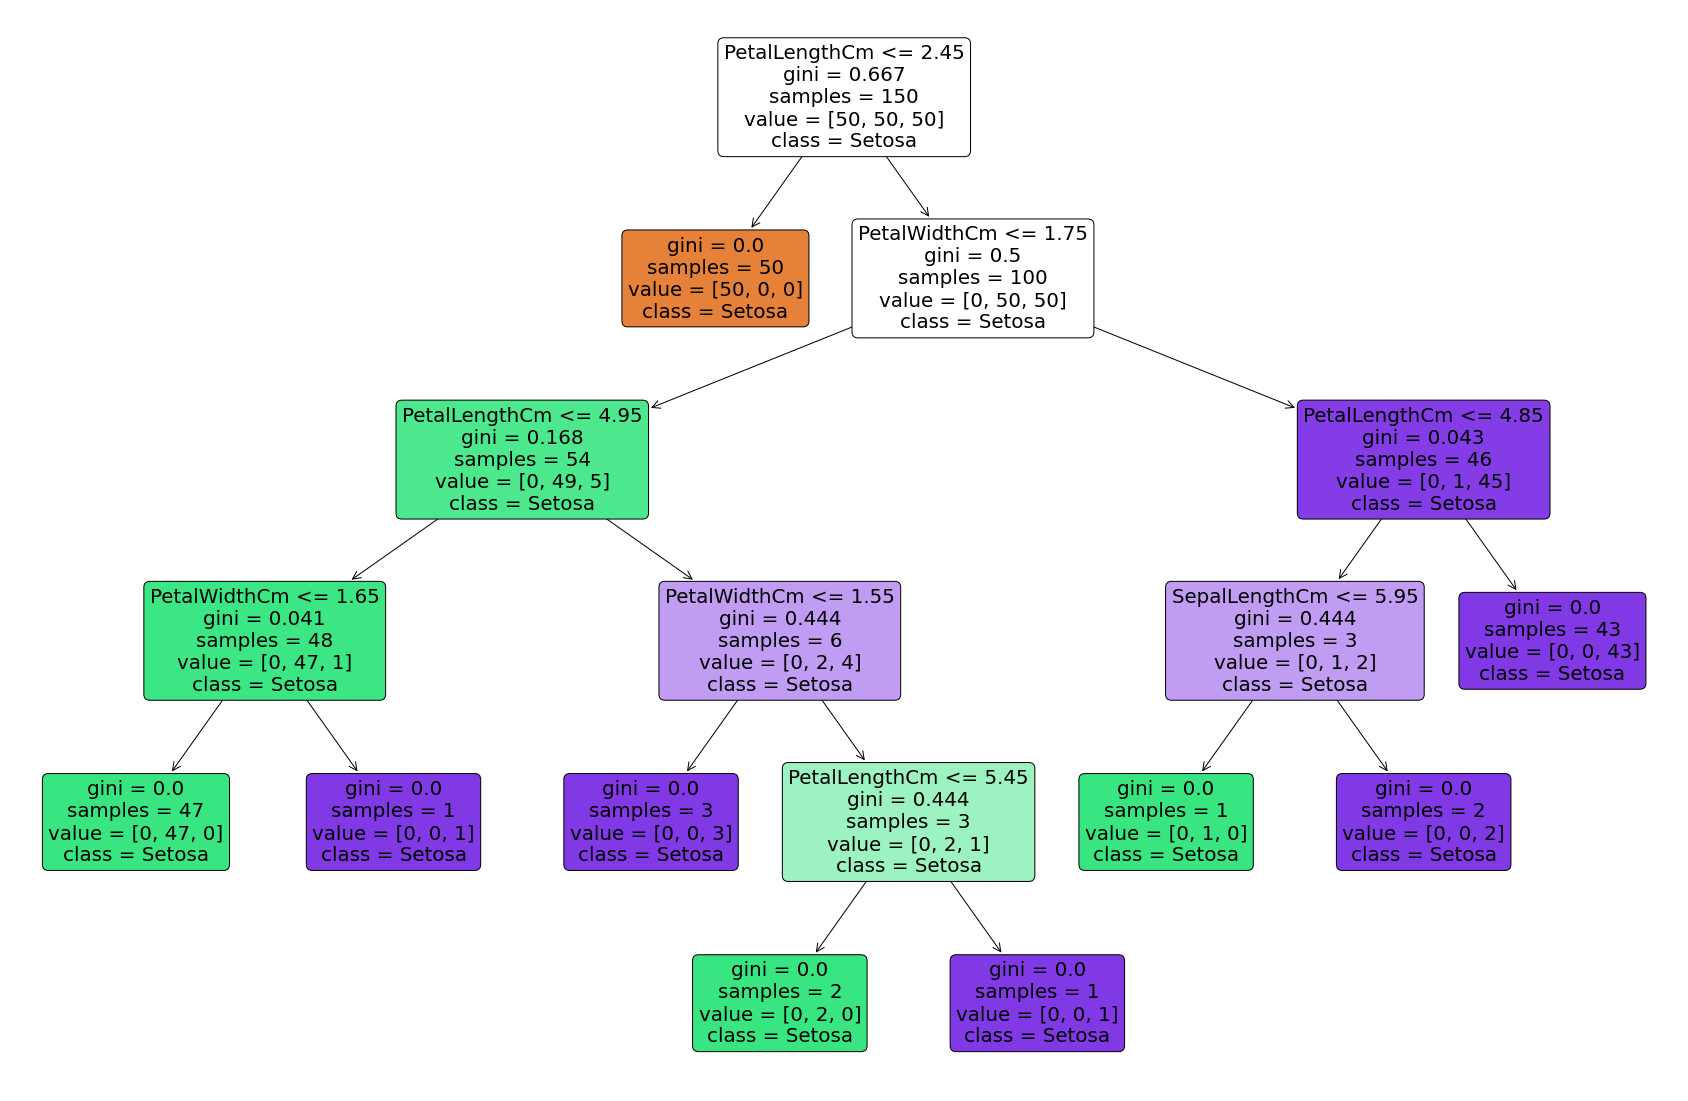

In [23]:
# Decision Tree visualization using plot_tree
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plot_tree(dtree, feature_names=x_features.columns, filled=True,rounded = True, class_names=[i.split('-')[1].title() for i in target]);

## Second type

In [38]:
# Decision Tree visualization using plot_tree
export_graphviz(dtree, feature_names=x_features.columns, out_file = 'dot_file.dot' ,filled=True,rounded = True, class_names=[i.split('-')[1].title() for i in target]);

In [36]:
! dot -Tpng dot_file.dot -o tree_image.png -Gpi=600

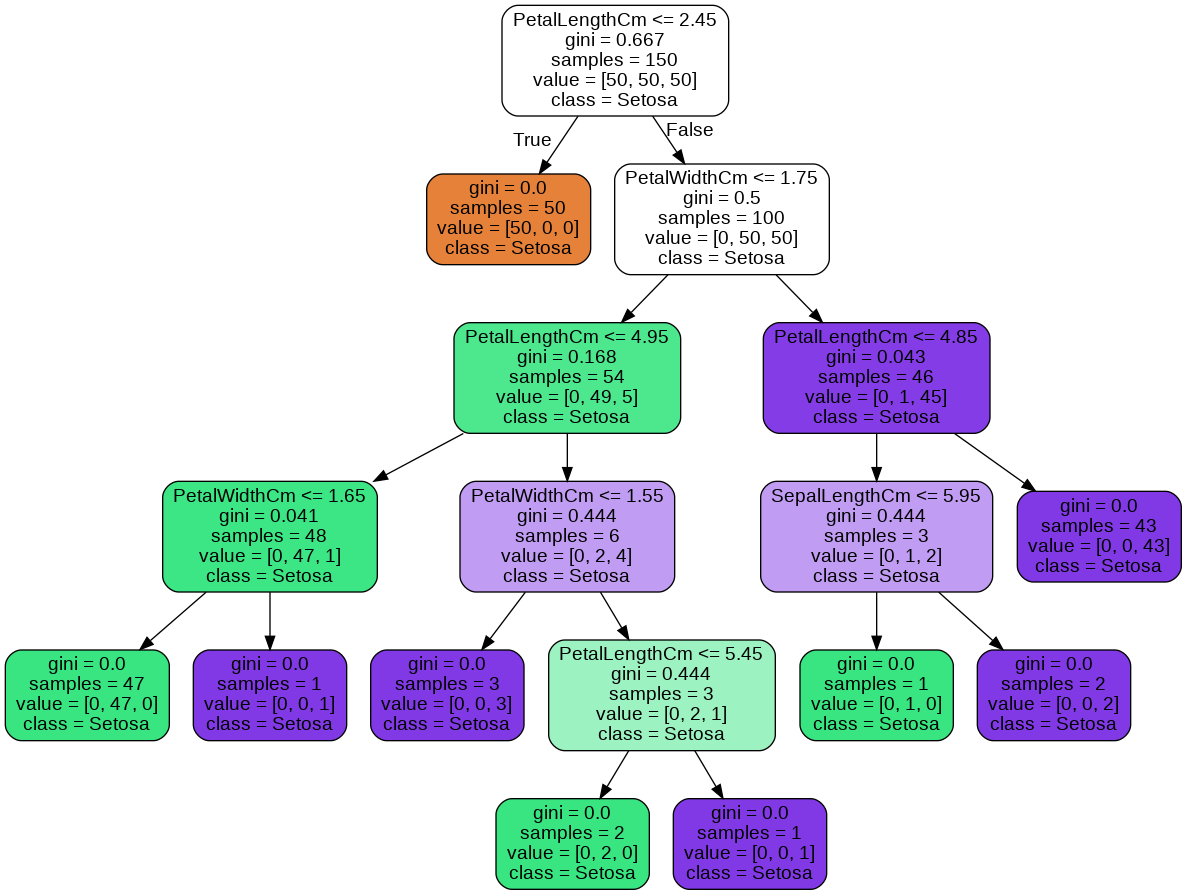

In [37]:
from IPython.display import Image
Image(filename='tree_image.png')

Hence, Through the our model we can predict the class of Species the Flower belongs.